# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/sebastian/anaconda3/envs/sb_intermediate_course/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


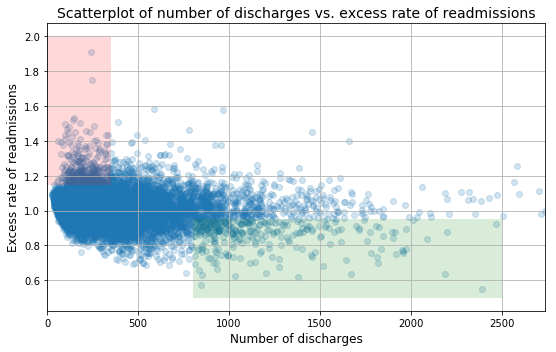

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**

+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Critique of Analysis 

There are a few issues with the observations above. While I agree that it looks like the rate of readmissions is trending down with increasing number of discharges, there really is no way of knowing. The plot would be a lot more helpful using a linear regression to show a trend. In addition, the strength of the relation could be interesting as well using Pearson's r.

The boundaries of the shaded areas seem arbitrary and don't seem like an "honest" representation of the data. Even just extending the areas across the entire width would improve the clarity. However, there is no clear reason why the green area ends at y=.95 and the red area starts at y=1.5. Those values lack an explanation of why they are relevant.

Furthermore, I believe a quantification of the areas could be helpful in the shape of a histogram for Hospitals with an excess rate of readmission and another one for those with lower rates.

For the statistical analysis, it's not adequate to perform a test on the hospitals for a capacity of < 100 and then make recommendations for hospitals with a capacity of < 300. Furthermore, it wasn't tested whether the difference between these two statistics is significant. We have to make sure that this is not just due to chance.

The conclusion assumes a correlation but the statistical analysis didn't actually test for correlation. 

# Own Analysis

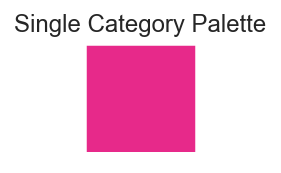

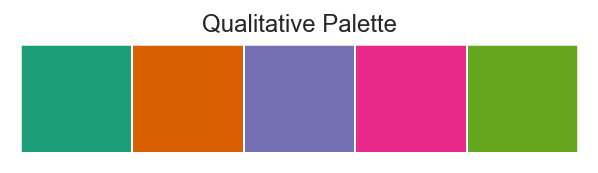

In [5]:
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()
default_palt = sns.color_palette(['#e7298a'])
qualitative_palt = sns.color_palette(['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e'])
sns.palplot(default_palt)
plt.title('Single Category Palette')
sns.palplot(qualitative_palt)
plt.title('Qualitative Palette')
sns.set_palette(default_palt)

# read in readmissions data provided
hospital_df = pd.read_csv('data/cms_hospital_readmissions.csv',na_values=['Not Available'],parse_dates=True)

In [6]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          11578 non-null float64
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


It looks like there is 3129 records that have no value for Excess Readmission Ratio and additionally 5282 records that don't have Number of Discharges recorded. It looks like there is exactly 3129 Footnotes, which could clarify how this data could be treated.

In [7]:
hospital_df.loc[~hospital_df['Footnote'].isnull(),'Footnote'].unique()

array([1., 5., 7.])

We have three footnote codes. 
- 1 -- The number of cases/patients is too few to report.
    This category of observations can safely be removed, as they have been classified as very small facilities.
- 5 -- Results are not available for this period.
    Since the results are not available these measurements can be removed as well.
- 7 -- No cases met the criteria for this measure.
    Similar to 1, we can safely remove these entries as they don't seem to be relevant to the analysis.

In [8]:
clean_hospital_df = hospital_df.loc[hospital_df['Footnote'].isnull(),:].copy()

In [9]:
ratio_w_o_discharges = clean_hospital_df.loc[clean_hospital_df['Number of Discharges'].isnull(),'Excess Readmission Ratio'].copy()

count    2234.000000
mean        0.977254
std         0.081908
min         0.629900
25%         0.937050
50%         0.974600
75%         1.016075
max         1.328700
Name: Excess Readmission Ratio, dtype: float64


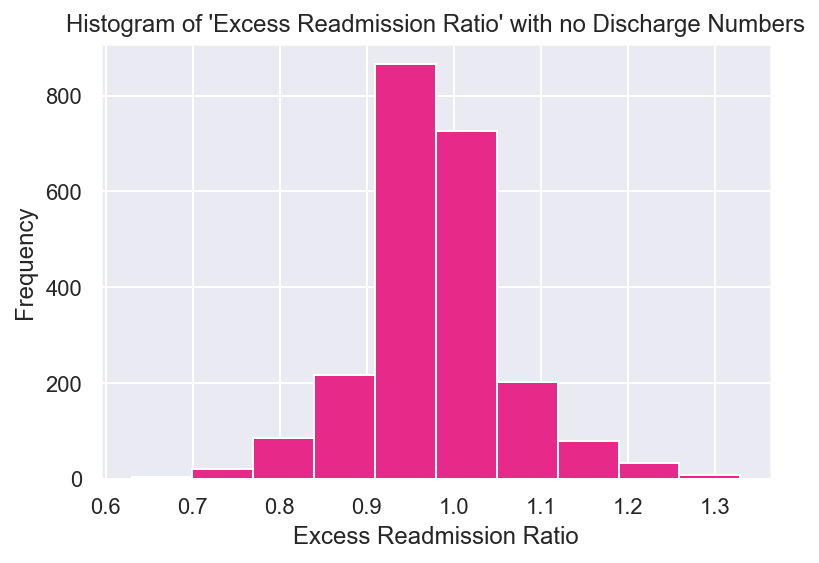

In [10]:
print(ratio_w_o_discharges.describe())
_ = plt.hist(ratio_w_o_discharges)
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Frequency')
_ = plt.title('Histogram of \'Excess Readmission Ratio\' with no Discharge Numbers')

Removing the observations with Footnotes got the data set closer to a clean state but there are still ~2000 entries with empty discharges, since there are no footnotes that can tell us how to proceed with these data points, we should attempt to keep them in our data set. The difficulty about adding the mean value, however, is that it could skew the relation to 'Excess Readmission Ratio' for the mean value of 'Number of Discharges', that's why I decided to see what the data distribution looks like. It is highly concentrated around 1.0 and the 1. and 3. quartile are above .937 and below 1.016. Due to it's concentration at 1.0 and the amount of data it carries it could certainly affect the correlation in either direction if the actual 'Number of Discharges' variable was concentrated as well. This needs to be taken into consideration for the conclusion but for practical reasons the null values in the 'Number of Discharges' need to be removed.

In [11]:
# Drop rows that have null values for 'Number of Discharges'
clean_hospital_df = clean_hospital_df.dropna(subset = ['Number of Discharges'])
clean_hospital_df.head()
clean_hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null float64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [12]:
print("Number of unique providers: ",len(clean_hospital_df.loc[:,['Provider Number']].drop_duplicates()))
print("Number of unique measured procedures: ",len(clean_hospital_df['Measure Name'].unique()))
print("Number of unique measured procedures and providers: ",len(clean_hospital_df.loc[:,['Provider Number','Measure Name']].drop_duplicates()))

Number of unique providers:  2993
Number of unique measured procedures:  5
Number of unique measured procedures and providers:  11497


In [13]:
clean_hospital_df = clean_hospital_df.sort_values(['Measure Name','Number of Discharges'])
clean_hospital_df['Measure Name'].unique()

array(['READM-30-AMI-HRRP', 'READM-30-COPD-HRRP', 'READM-30-HF-HRRP',
       'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP'], dtype=object)

It looks like there is a lot more observations than unique Hospitals (i.e. duplicate hospitals). The data is in fact split by 'Measure Name'/Type of Procedure so apart from different readmission rates we should also look into whether different departments in Hospitals have higher readmission rates than others.

Let's have a look at those categories with a pair plot!

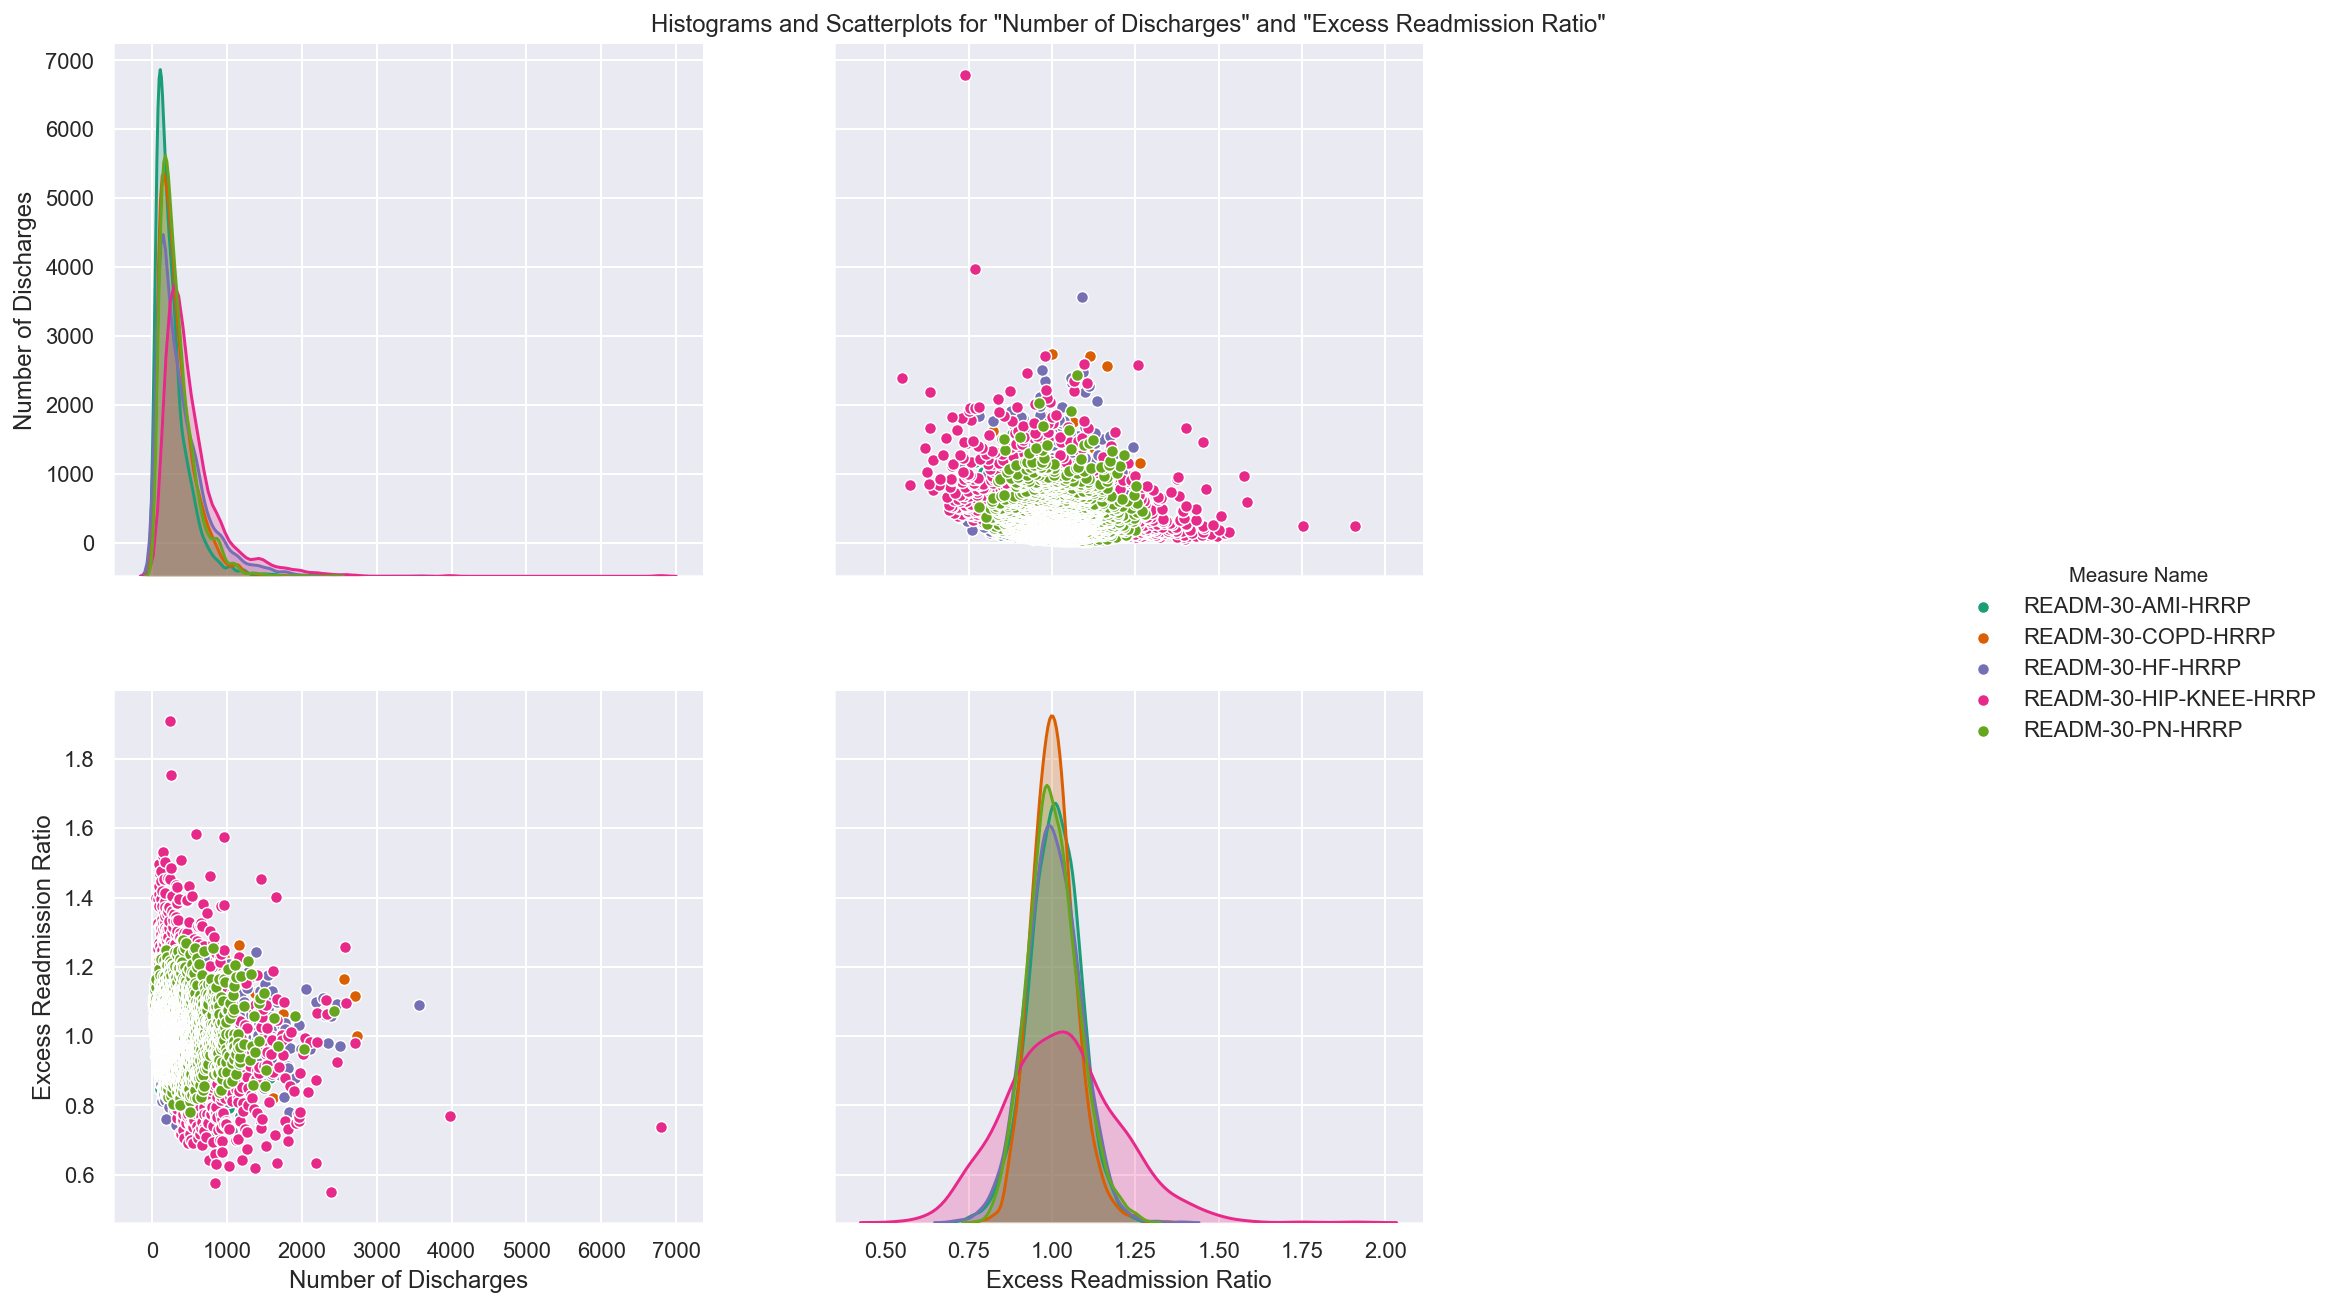

In [14]:
data = clean_hospital_df.loc[:,['Measure Name','Number of Discharges','Excess Readmission Ratio']]

# Use a Pair plot to explore the Categories ('Measure Name') and look for anything that stands out
g = sns.pairplot(data,hue='Measure Name',palette=qualitative_palt)
plt.title('Histograms and Scatterplots for "Number of Discharges" and "Excess Readmission Ratio"')
g.fig.set_size_inches(18,10)

Looking at the histogram in the lower right corner, the category HIP-KNEE (Magenta), clearly shows a higher variability in Excess Readmission Ratio.

The Scatter plots are less helpful for a regression analysis, which is why we'll have a closer look at the regressions by category in the following graphs.

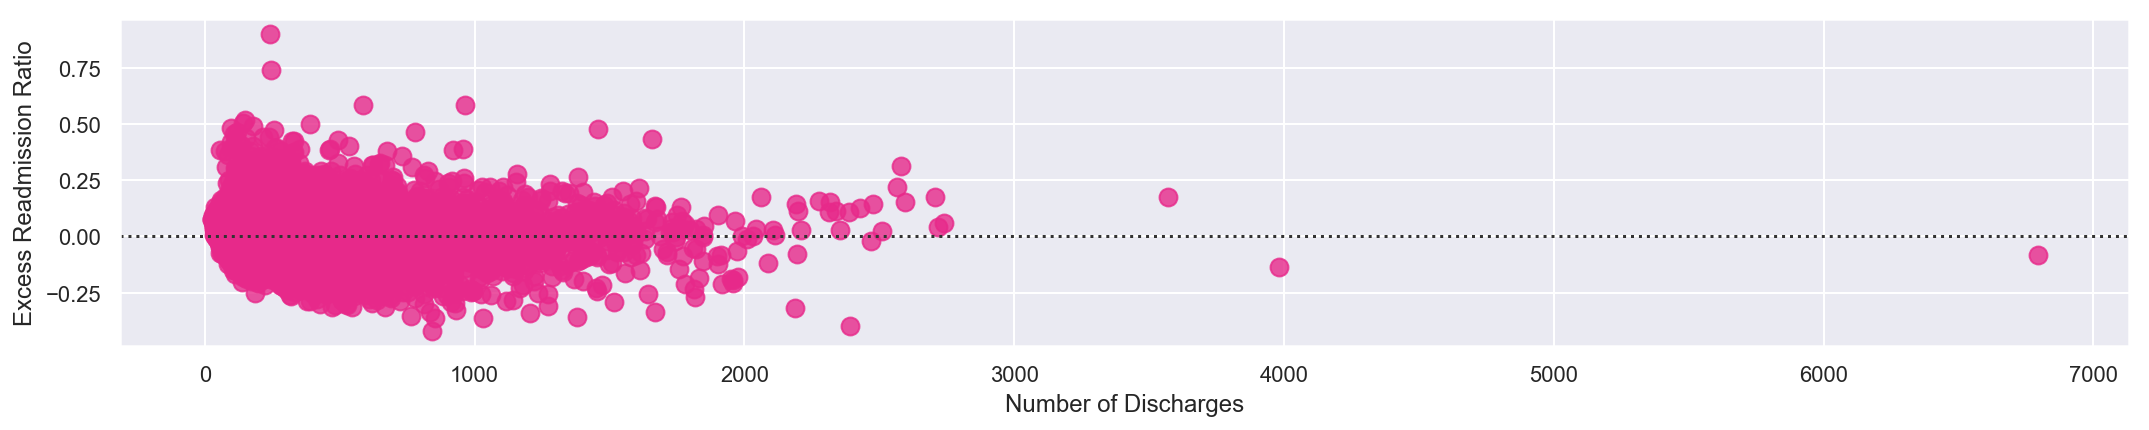

In [15]:
# Check the Linear Regression Model with a Residual Plot
plt.figure(figsize=(18,3))

g = sns.residplot(x='Number of Discharges', y='Excess Readmission Ratio', data=data, scatter_kws={"s": 80})

A linear regression model looks like a good pick, as the observations are distributed more or less randomly around the horizontal line at 0.0.

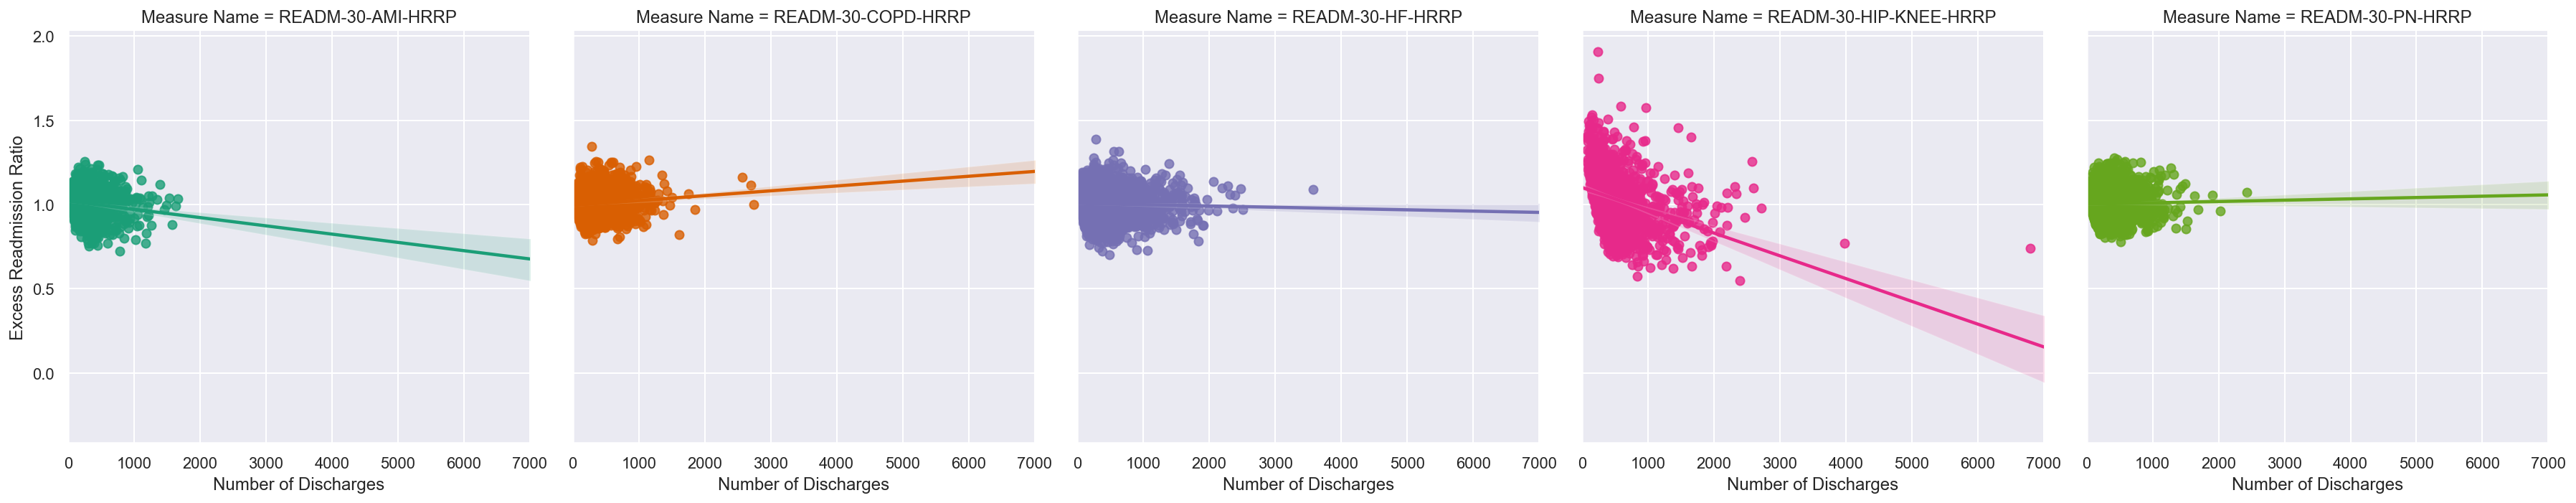

In [16]:
g = sns.lmplot(x='Number of Discharges',y='Excess Readmission Ratio',col='Measure Name',data=data,
               hue='Measure Name',palette=qualitative_palt)
_ = plt.xlim(0,7000)

The linear regression plots show that the categories COPD, HF and PN show little to no correlation between 'Excess Readmission Ratio' and 'Number of Discharges'. AMI looks like it has some correlation between the two factors but the clearest regression line is drawn for HIP KNEE, indicating a relatively strong negative correlation. Hence, the following analysis will put its first focus on the category HIP KNEE.

#### 5. Looking at the scatter plot of the previous analysis and making changes to its visualization

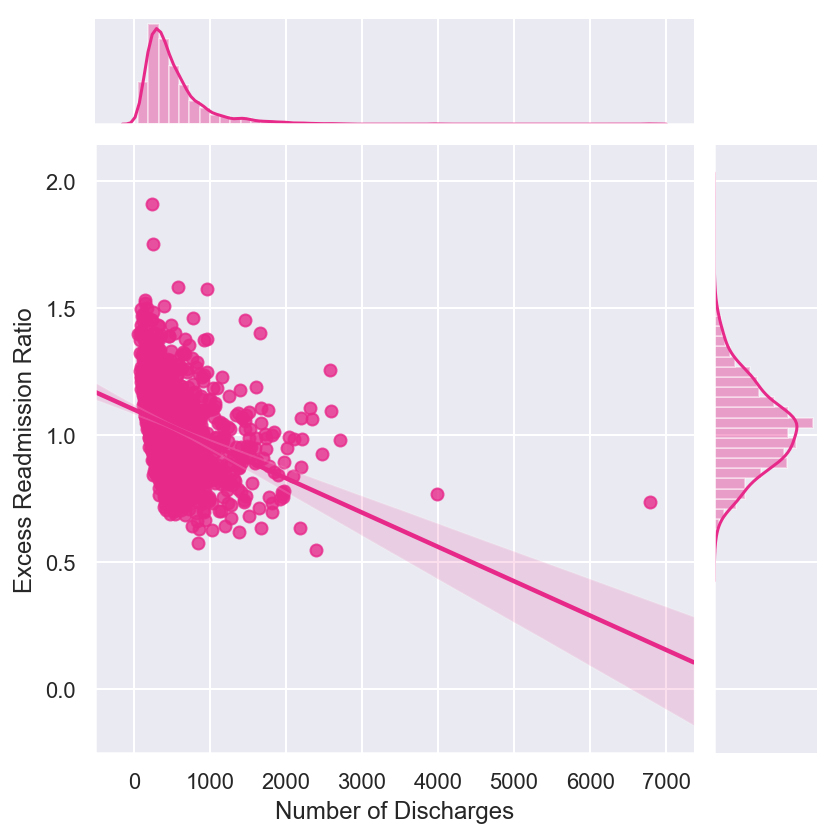

For every additional 100 discharges, the excess readmission ratio drops by -0.013528349626777344 (on average)
Pearson's r: -0.3502044441798684, p: 7.784966842321882e-41


In [17]:
data_hipknee = data.loc[data['Measure Name'] == 'READM-30-HIP-KNEE-HRRP',:].copy()

g = sns.jointplot(x='Number of Discharges',y='Excess Readmission Ratio',data=data_hipknee,kind='reg')
plt.show()
slope, intercept = np.polyfit(data_hipknee['Number of Discharges'],data_hipknee['Excess Readmission Ratio'],1)
steps = 100
print("For every additional {} discharges, the excess readmission ratio drops by {} (on average)".format(steps, steps * slope))
r,p = stats.pearsonr(x=data_hipknee['Number of Discharges'],y=data_hipknee['Excess Readmission Ratio'])
print("Pearson's r: {}, p: {}".format(r,p))

Now that we've seen a moderate correlation between 'Number of Discharges' and 'Excess Readmission Ratio', we'll also have a look at the distribution for the HIP-KNEE cateogory.

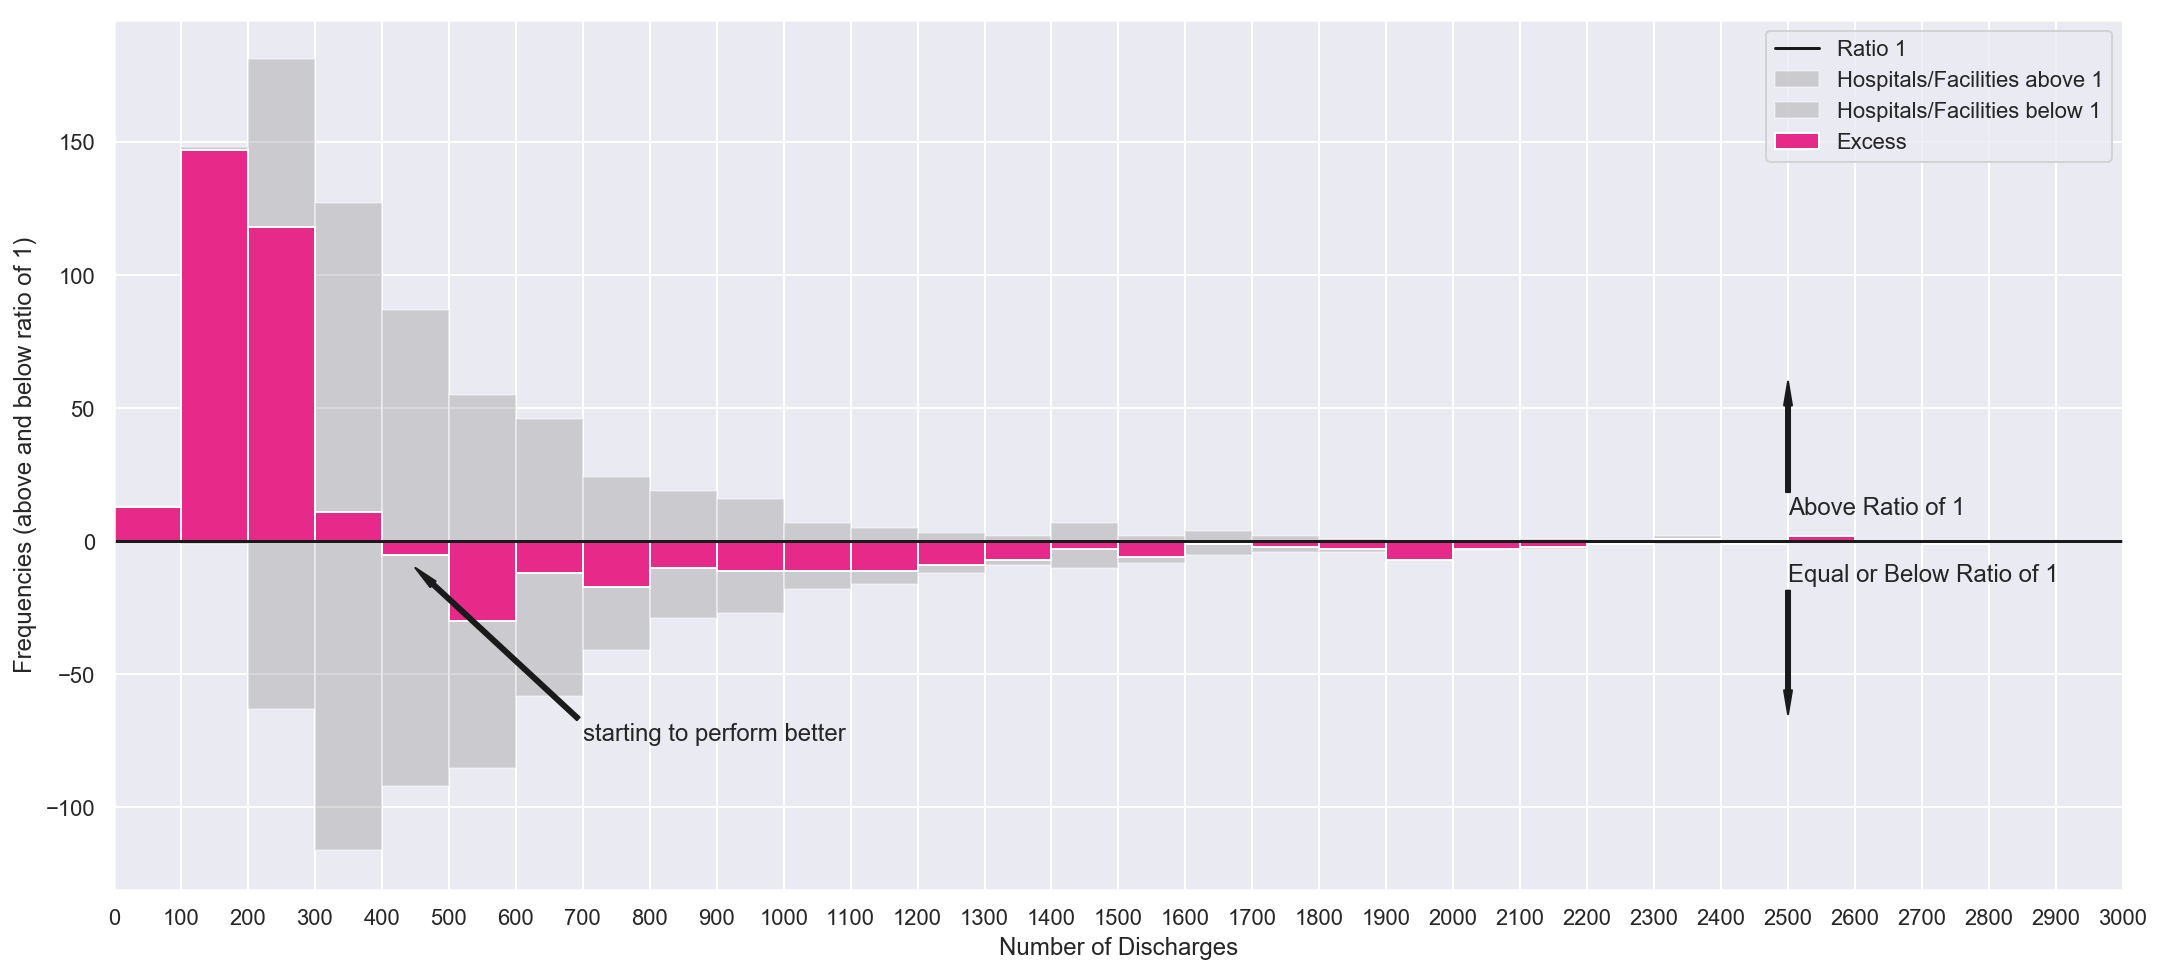

In [18]:
data_hipknee.loc[:,'Exceeds Ratio of 1'] = data_hipknee['Excess Readmission Ratio'] > 1.0
data_hipknee.loc[:,'Exceeds Ratio of 1'] = data_hipknee['Exceeds Ratio of 1'].replace({True: 1,False: -1})
data_hipknee_sorted = data_hipknee.sort_values(by='Number of Discharges')

bin_size = 100
nr_of_bins = round(max(data_hipknee['Number of Discharges'])/bin_size)
bins_sum = np.empty(nr_of_bins)
bins_exceeds= np.empty(nr_of_bins)
bins_below= np.empty(nr_of_bins)
x = []
for i in range(nr_of_bins):
    upper_bound = (i + 1) * bin_size
    lower_bound = i * bin_size
    x.append(lower_bound + bin_size/2)
    bin_exceeds_entries = data_hipknee_sorted.loc[(data_hipknee_sorted['Number of Discharges'] <= upper_bound) &
                                     (data_hipknee_sorted['Number of Discharges'] > lower_bound), 'Excess Readmission Ratio'] > 1.0
    bin_below_entries = data_hipknee_sorted.loc[(data_hipknee_sorted['Number of Discharges'] <= upper_bound) &
                                     (data_hipknee_sorted['Number of Discharges'] > lower_bound), 'Excess Readmission Ratio'] <= 1.0
    bins_sum_entries = data_hipknee_sorted.loc[(data_hipknee_sorted['Number of Discharges'] <= upper_bound) &
                (data_hipknee_sorted['Number of Discharges'] > lower_bound), 'Exceeds Ratio of 1']
    bins_exceeds[i] = np.sum(bin_exceeds_entries)
    bins_below[i] = -np.sum(bin_below_entries)
    bins_sum[i] = np.sum(bins_sum_entries)

plt.figure(figsize=(18,8))
plt.bar(x,bins_exceeds,width=bin_size,color='gray',alpha=0.3)
plt.bar(x,bins_below,width=bin_size,color='gray',alpha=0.3)
plt.xticks([x_pos - bin_size/2 for x_pos in x])
plt.xlim(0,3000)

ratio_1_x = [0,3000]
ratio_1_y = [0,0]

plt.plot(ratio_1_x,ratio_1_y,color='k')
plt.annotate(s="Above Ratio of 1",xy=(2500,60),xytext=(2500,10),arrowprops={'width':2,'headwidth':4,'color':'k'})
plt.annotate(s="Equal or Below Ratio of 1",xy=(2500,-65),xytext=(2500,-15),arrowprops={'width':2,'headwidth':4,'color':'k'})

plt.bar(x,bins_sum,width=bin_size)
plt.annotate(s="starting to perform better",xy=(450,-10),xytext=(700,-75),arrowprops={'width':2,'headwidth':4,'color':'k'})
plt.xlabel('Number of Discharges')
plt.ylabel('Frequencies (above and below ratio of 1)')

plt.legend(['Ratio 1','Hospitals/Facilities above 1','Hospitals/Facilities below 1','Excess'])

plt.show()

In [19]:
def pct(subset,total):
    return round(subset/total * 100,2)

# Number of Hospitals above/below Ratio 1 for <=400 discharges
data_hipknee_below_400 = data_hipknee_sorted.loc[data_hipknee_sorted['Number of Discharges'] <= 400, 'Excess Readmission Ratio']
total = len(data_hipknee_below_400)
above_1 = np.sum(data_hipknee_below_400 > 1.0)
below_or_equal_1 = np.sum(data_hipknee_below_400 <= 1.0)
print("For facilities/hospitals with <=400 Discharges (HIP KNEE) \nAbove Ratio of 1: {}%, Below Ratio of 1: {}%".format(pct(above_1,total),pct(below_or_equal_1,total)))
print('---')

# Number of Hospitals above/below Ratio 1 for >400 discharges
data_hipknee_over_400 = data_hipknee_sorted.loc[data_hipknee_sorted['Number of Discharges'] > 400, 'Excess Readmission Ratio']
total = len(data_hipknee_over_400)
above_1 = np.sum(data_hipknee_over_400 > 1.0)
below_or_equal_1 = np.sum(data_hipknee_over_400 <= 1.0)
print("For facilities/hospitals with >400 Discharges (HIP KNEE) \nAbove Ratio of 1: {}%, Below Ratio of 1: {}%".format(pct(above_1,total),pct(below_or_equal_1,total)))

For facilities/hospitals with <=400 Discharges (HIP KNEE) 
Above Ratio of 1: 72.27%, Below Ratio of 1: 27.73%
---
For facilities/hospitals with >400 Discharges (HIP KNEE) 
Above Ratio of 1: 39.47%, Below Ratio of 1: 60.53%


The graph above shows the total number of facilities in each category that were either above or below the ratio of 1 in gray and the excess for each category size is displayed in magenta. We can see that overall at 400 the excess graph shifts to better results. That means historically facilities with >400 discharges for HIP-KNEE were consistently performing better. In fact, a ratio of 1 or below was found in 60.52% of facilities/hospitals with >400 discharges, while only 27.73% of facilities/hospitals with <=400 discharges were able to meet that goal.

# Statistical Analysis


#### 1. Setting up a Hypothesis Test 

Above we've seen that the data suggests that there is a moderate correlation between 'Number of Discharges' and 'Excess Readmission Ratio'. In the following we'll formulate a hypothesis and check the likelihood of this correlation being replicated if we did this sampling again.

    H0: The 'Number of Discharges' and the 'Excess of Readmission Ratio' is completely uncorrelated.
    
We're looking at this as a two-sided test, as correlation in either direction is important to us. We'll add a high level of certainty with a 99% Confidence Interval (𝛼=.01).

#### 2. & 3. Compute and Report p-value and statistical significance for alpha = 0.01

In [20]:
def pearson_r(x,y):
    pearson_matrix = np.corrcoef(x,y)
    return pearson_matrix[0,1]

x=data_hipknee['Number of Discharges']
y=data_hipknee['Excess Readmission Ratio']

r_obs=pearson_r(x,y)
print("Pearson's R: {}".format(r_obs))

Pearson's R: -0.35020444417986846


In [21]:
def test_pearson_correlation(r_obs,x,y,size=10000):
    perm_replicates = np.empty(size)
    
    for i in range(size):
        y_permuted = np.random.permutation(y)
        perm_replicates[i] = pearson_r(x,y_permuted)
    
    if r_obs >= 0:
        p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
    else:
        p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
    return p

print("p: {}".format(test_pearson_correlation(r_obs,x,y,size=10000)))

p: 0.0


_Interpretation:_ The p-value for this test is 0 (for 10000 attempts), meaning it is highly unlikely that this correlation is just noise. Pearson's R shows a moderate correlation.

_Conclusion:_ We can reject H0, there is a negative correlation between the Excess Readmission Ratio and the Number of Discharges. These are statistically significant results, the more discharges a facility/hospital had in the HIP-KNEE category the better they fare in the 'Excess Readmission Ratio'.

_Further Questions:_ We should remember that a considerable portion of observations had to be dropped due to lack discharge numbers. Ideally, we could compare these numbers with numbers of the following period where numbers were recorded for providers that couldn't be included in this analysis.

# 4. Statistical vs. Practical Significance

When we look at results we always have to weigh statistical and practical significance. Statistical significance considers whether a hypothesis is true or not within a specified Confidence Interval. With the correct methods and large enough samples it is possible to detect even small differences and conclude that these changes are not due to chance. Nevertheless, often times small changes might be statistically significant but due to other costs (e.g. time, money etc.) we don't consider it practically significant.

In this case, we were able to find a statistically significant correlation between the number of discharges related to HIP KNEE and the Excess Readmission Ratio. Facilities/Hospitals with larger discharge numbers (>400) for HIP KNEE procedures were performing better than smaller facilities. However, we saw that the slope of the linear regression line was pretty shallow (for +100 Discharges the Excess Readmission Ratio drops by about -0.0135 points). The linear regression line provides us an aggregated expected effect. We're not expecting huge improvements by increasing facilities/hospitals as the investment and restructuring might not pay off. A possibly more cost-effective way could be to reconsider specializations of facilities/hospitals by moving HIP KNEE procedures to larger facilities/hospitals where possible as this seems to be the one category that underperforms in smaller facilities/hospitals. Nevertheless, close attention should be paid to the cost-effectiveness of these measures vs. improvements.